
**Fuzzy Logic Controller for Swarm Formation Control and Obstacle Avoidance** <br>
CS6251 - CMC Project <br>

Anvith Pabba - EE19B070 <br>
Hema Landa - EE19B036 <br>


We first have to download the Fuzzy_Expert package

In [119]:
pip install fuzzy_expert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This only needs to be done if running on a local machines, where the path points to where the fuzzy expert package is kept

In [120]:
# import os

# os.chdir(r"C:\Users\suma\anaconda3\Lib\site-packages\fuzzy_expert") #change the path as required

In [121]:
#import the dependencies

import warnings

warnings.filterwarnings("ignore")

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

In [123]:
#maximum length of the maze (i.e when diagonal)

length = 200

In [124]:
#parameters of the fuzzy sets

slow0 = 0
slow1 = moderate0 = 5
slow2 = moderate1 = fast0 = 10
moderate2 = fast1 = 15
fast2 = 20
num_angles = 6
angle_flexion = 180/num_angles

In [125]:
#setting up the fuzzy sets

variables = {
    "sensor0": FuzzyVariable(
        universe_range=(0, length),
        terms={
            "near": [(0, 1), (5, 1), (8, 0), (length, 0)],
            "far": [(7, 0), (10, 1), (length, 1)],
        },
    ),
    "sensor90": FuzzyVariable(
        universe_range=(0, length),
        terms={
            "near": [(0, 1), (5, 1), (8, 0), (length, 0)],
            "far": [(7, 0), (10, 1), (length, 1)],
        },
    ),
    #
    "sensor180": FuzzyVariable(
        universe_range=(0, length),
        terms={
            "near": [(0, 1), (5, 1), (8, 0), (length, 0)],
            "far": [(7, 0), (10, 1), (length, 1)],
        },
    ),
    #
    "speed": FuzzyVariable(
        universe_range=(0, fast2),
        terms={
            "slow": [(slow0, 0), (slow1, 1), (slow2, 0)],
            "moderate": [(moderate0, 0), (moderate1, 1), (moderate2, 0)],
            "fast": [(fast0, 0), (fast1, 1), (fast2, 0)],
        },
    ),
    #
    "angle": FuzzyVariable(
        universe_range=(0*angle_flexion-5,9*angle_flexion+5),
        terms={
            "right": [(0*angle_flexion-5, 0), (0*angle_flexion, 1), (0*angle_flexion+5, 0)],
            "straight": [(3*angle_flexion-5, 0), (3*angle_flexion, 1), (3*angle_flexion+5, 0)],
            "left": [(6*angle_flexion-5, 0), (6*angle_flexion, 1), (6*angle_flexion+5, 0)],
#             "backwardright":[(6*angle_flexion,0),(7*angle_flexion,1),(8*angle_flexion,0)],
             "backward":[(9*angle_flexion-5,0),(9*angle_flexion,1),(9*angle_flexion+5,0)],
#             "backwardleft":[(11*angle_flexion,0),(11*angle_flexion,1),(11*angle_flexion,0)]
        },
    ),
}

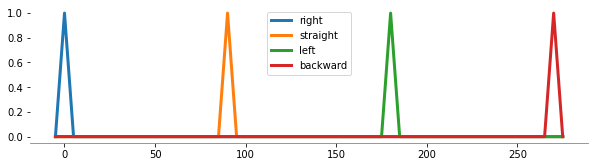

In [126]:
plt.figure(figsize=(10, 2.5))
variables["angle"].plot()

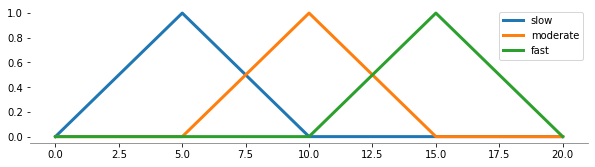

In [127]:
plt.figure(figsize=(10, 2.5))
variables["speed"].plot()

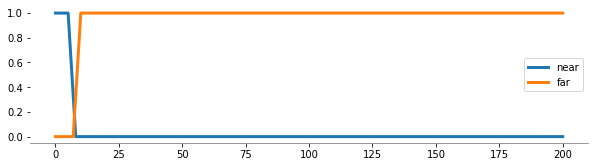

In [128]:
plt.figure(figsize=(10, 2.5))
variables["sensor0"].plot()

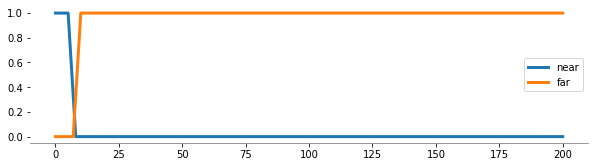

In [129]:
plt.figure(figsize=(10, 2.5))
variables["sensor90"].plot()

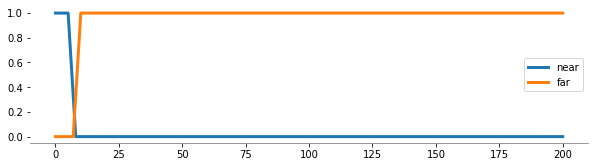

In [130]:
plt.figure(figsize=(10, 2.5))
variables["sensor180"].plot()

In [131]:
#these help us in autmating the rule making process

def TemplatePremise3Sensors(a):
    temp = [
            ("sensor0", a[0]),
            ("AND", "sensor90", a[1]),
            ("AND", "sensor180", a[2]),
        ]
    return temp

In [132]:
def TemplateConsequence3Sensors(a):
    temp = [
            ("speed", a[0]),
            ("angle",a[1]),
        ]
    return temp

In [133]:
def AllPermutations(a,b,n):
    
    if n==0:
        return a
    
    temp = []
    for i in a:
        for j in b:
            temp1 = i[:]
            temp1.append(j)
            
            temp.append(temp1)
            
    return AllPermutations(temp,b,n-1)

In [134]:
AllPermutations([[]],['near','medium','far'],3) #Sanity check

[['near', 'near', 'near'],
 ['near', 'near', 'medium'],
 ['near', 'near', 'far'],
 ['near', 'medium', 'near'],
 ['near', 'medium', 'medium'],
 ['near', 'medium', 'far'],
 ['near', 'far', 'near'],
 ['near', 'far', 'medium'],
 ['near', 'far', 'far'],
 ['medium', 'near', 'near'],
 ['medium', 'near', 'medium'],
 ['medium', 'near', 'far'],
 ['medium', 'medium', 'near'],
 ['medium', 'medium', 'medium'],
 ['medium', 'medium', 'far'],
 ['medium', 'far', 'near'],
 ['medium', 'far', 'medium'],
 ['medium', 'far', 'far'],
 ['far', 'near', 'near'],
 ['far', 'near', 'medium'],
 ['far', 'near', 'far'],
 ['far', 'medium', 'near'],
 ['far', 'medium', 'medium'],
 ['far', 'medium', 'far'],
 ['far', 'far', 'near'],
 ['far', 'far', 'medium'],
 ['far', 'far', 'far']]

In [135]:
OutputAttributes = [
    
    ['slow','backward'],
    ['slow','left'],
    ['moderate','left'],
    ['slow','straight'],
    ['slow','left'],
    ['moderate','left'],
    ['fast','straight'],
    ['fast','straight'],
    ['fast','straight'],
    ['moderate','right'],
    ['moderate','right'],
    ['slow','left'],
    ['moderate','right'],
    ['moderate','right'],
    ['moderate','left'],
    ['fast','straight'],
    ['fast','straight'],
    ['fast','straight'],
    ['moderate','right'],
    ['moderate','right'],
    ['moderate','right'],
    ['moderate','right'],
    ['moderate','right'],
    ['moderate','straight'],
    ['fast','straight'],
    ['fast','right'],
    ['fast','straight']
    
]

In [136]:
InputPossibilities = AllPermutations([[]],['near','medium','far'],3)

In [137]:
noMedium=[]

for i in range(len(InputPossibilities)):
    if InputPossibilities[i][0]=='medium' or InputPossibilities[i][1]=='medium' or InputPossibilities[i][2]=='medium':
        noMedium.append(i)

In [138]:
rules = [0]*(27-len(noMedium))

In [139]:
j=0
for i in range(len(InputPossibilities)):
    if i not in noMedium:
        rules[j] = FuzzyRule(
                premise=TemplatePremise3Sensors(InputPossibilities[i]),
                consequence=TemplateConsequence3Sensors(OutputAttributes[i]),
            ),
        j+=1

In [140]:
for i in range(len(rules)):
    rules[i] = rules[i][0]

In [141]:
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

In [142]:
#this is the model

model(
    variables=variables,
    rules=rules,
    sensor0=70,
    sensor90=5,
    sensor180=20,
)

({'speed': 9.999999999999996, 'angle': -2.2794266474335246e-16}, 1.0)

In [143]:
#This is the FLC

def FLC(s0,s90,s180):
    temp = model(
                variables=variables,
                rules=rules,
                sensor0=s0,
                sensor90=s90,
                sensor180=s180,
                )
    return [temp[0]['speed'],temp[0]['angle']]

In [144]:
#interactive dashboard that shows how the values change as the inputs are changed

# from ipywidgets import interact, widgets

# def demo(sensor0, sensor90, sensor180):
#     plt.figure(figsize=(10,6))
#     model.plot(
#         variables=variables,
#         rules=rules,
#         sensor0=sensor0,
#         sensor90=sensor90,
#         sensor180=sensor180,
#     )

# interact(
#     demo,
#     sensor0=widgets.FloatSlider(min=0, max=200),
#     sensor90=widgets.FloatSlider(min=0, max=200),
#     sensor180=widgets.FloatSlider(min=0, max=200),
# )

Inserting obstacle functions

In [145]:
def insertrectangle(A,leftcorner,length,width):
    for i in range(length):
        for j in range(width):
            A[leftcorner[0]+i,leftcorner[1]+j] = 9

In [146]:
def insertline(A,initialpoint,length,horizontalorvertical):
    if horizontalorvertical == "horizontal":
        for i in range(length):
            A[initialpoint[0]+i,initialpoint[1]] = 9
    else:
        for i in range(length):
            A[initialpoint[0],initialpoint[1]+i] = 9

In [147]:
def insertrectanglecoords(A,leftcorner,length,width):
    coordsX = []
    coordsY = []
    for i in range(length):
        for j in range(width):
            coordsX.append(leftcorner[0]+i)
            coordsY.append(leftcorner[1]+j)
            
    return [coordsX,coordsY]

In [148]:
def insertlinecoords(A,initialpoint,length,horizontalorvertical):
    coordsX = []
    coordsY = []
    if horizontalorvertical == "horizontal":
        for i in range(length):
            coordsX.append(initialpoint[0]+i)
            coordsY.append(initialpoint[1])
            
    else:
        for i in range(length):
            coordsX.append(initialpoint[0])
            coordsY.append(initialpoint[1]+i)
            
    return [coordsX,coordsY]

Getting the readings of the 3 sensors

In [149]:
def sensor0reading(pos,maze):
    x = pos[0]
    y = pos[1]
    r = 0
    
    while int(maze[x][y])!=9 and y>0:
        y-=1
        r+=1
        
    return r

In [150]:
def sensor90reading(pos,maze):
    x = pos[0]
    y = pos[1]
    r = 0
    
    while int(maze[x][y])!=9 and x<len(maze)-1:
        x+=1
        r+=1
        
    return r

In [151]:
def sensor180reading(pos,maze):
    x = pos[0]
    y = pos[1]
    r = 0
    
    while int(maze[x][y])!=9 and y<len(maze)-1:
        y+=1
        r+=1
        
    return r

The following code was only for the obstacle avoidance and can be ignored unless required

In [152]:
# TrainingData = []

In [153]:
# maze = np.zeros((101,101))

# # insertrectangle(maze,[30,30],10,40)
# # insertline(maze,[0,45],20,"horizontal")
# # insertline(maze,[0,55],30,"horizontal")

# # for i in range(10):
# #     maze[45+i][45+i] = 9

# for i in range(11):
#     maze[45+i][45+i] = 9
# for i in range(10):
#     maze[45+i][65-i] = 9
    
# num_epochs = 20

# maze[0][50] = 1 #initial position
# pos = [0,50]

# # for i in maze:
# #     print(i)

In [154]:
# posList = []
# v = 0.2

In [155]:
# for i in range(num_epochs):
    
#     temp = pos[:]
#     posList.append(temp)
    
#     maze[pos[0]][pos[1]] = 0
        
#     s0 = sensor0reading(pos,maze)
#     s90 = sensor90reading(pos,maze)
#     s180 = sensor180reading(pos,maze)
    
#     speed,angle = FLC(s0,s90,s180)
    
#     TrainingData.append([s0,s90,s180,speed,angle])
    
#     print(str(s0)+" "+str(s90)+" "+str(s180))
#     print(str(speed)+" "+str(angle))
#     print(str(pos[0])+" "+str(pos[1]))
#     print(str(pos[0])+" "+str(pos[1]))
#     print(str(np.cos(angle*np. pi/180))+" "+str(np.cos(angle*np. pi/180)*speed*0.1))

# #     print(pos)
    
#     pos[1] -= np.cos(angle*np. pi/180)*speed*v
    
# #     print(pos)
    
#     pos[1] = round(pos[1])
    
# #     print(pos)
    
#     pos[0] += np.sin(angle*np. pi/180)*speed*v
    
# #     print(pos)
    
#     pos[0] = round(pos[0])
    
# #     print(pos)
    
#     maze[pos[0]][pos[1]] = 1
    
# #     for i in maze:
# #         print(i)
        
#     print()
#     print()
#     print()

In [156]:
# posX = []
# posY = []

# for i in posList:
#     posX.append(i[0])
#     posY.append(i[1])

In [157]:
# # xtemp,ytemp = insertrectanglecoords(maze,[30,30],10,40)

# # xtemp,ytemp = insertrectanglecoords(maze,[30,30],10,40)
# # xtemp+=insertlinecoords(maze,[0,45],20,"horizontal")[0]
# # ytemp+=insertlinecoords(maze,[0,45],20,"horizontal")[1]
# # xtemp+=insertlinecoords(maze,[0,55],30,"horizontal")[0]
# # ytemp+=insertlinecoords(maze,[0,55],30,"horizontal")[1]

# xtemp=[45+i for i in range(11)]+[45+i for i in range(10)]
# ytemp=[45+i for i in range(11)]+[65-i for i in range(10)]

# # xtemp=[45+i for i in range(9)]
# # ytemp=[45+i for i in range(9)]

# # xtemp=[45+i for i in range(10)]
# # ytemp=[45+i for i in range(10)]

In [158]:
# plt.scatter(posX,posY,marker = 'o')
# plt.scatter(xtemp,ytemp,marker = 'x')
# plt.xlim([0,101])
# plt.ylim([0,101])
# plt.plot

Now for the obstacle avoidance + Formation control + target seeking

Getting the distances to the target:

In [159]:
def zero90180distancestotarget(currentposition,target):
    zero = currentposition[1]-target[1]
    oneeighty = -1*zero
    zero = max(zero,0)
    oneeighty = max(oneeighty,0)
    ninety = target[0]-currentposition[0]
    
    normalisationconst = (zero**2+ninety**2+oneeighty**2)**0.5
    
    if normalisationconst==0:
        return([0,0,0])
    
    zero = zero/normalisationconst
    oneeighty = oneeighty/normalisationconst
    ninety = ninety/normalisationconst
    
    return([zero,ninety,oneeighty])

In [160]:
def alphaforAvoidancevsControl(s0,s90,s180,expectedpath):
    
    expectedalpha = 0
    
    if s0/2 < expectedpath[0] or s90/2 < expectedpath[1] or s180/2 < expectedpath[2]:
        expectedalpha = 1
        
    else:
        expectedalpha = 0
        
    return expectedalpha   

In [161]:
def sign(n): 
  if n<0: return -1 
  elif n>0: return 1 
  else: 0 

pathchecker checks if the robot will hit an obstacle or not

In [162]:
def pathchecker(currentpos,x,y,maze):

  currentpos1 = currentpos[:]

  for i in range(abs(x)):
    if int(maze[currentpos1[0]+sign(x)*(i+1)][currentpos1[1]])==9:
      return 1
  for j in range(abs(y)):
    if int(maze[currentpos1[0]+x][currentpos1[1]+(sign(y))*(j+1)])==9:
      return 1

  return 0

In [163]:
def alphadash(expectedpath,currentpos1,maze):
    
    currentpos = currentpos1[:]
    
    currentpos[1] -= (expectedpath[0] - expectedpath[2])
    currentpos[0] += (expectedpath[1])
    
    currentpos[1] = round(currentpos[1])
    currentpos[0] = round(currentpos[0])
    
#     print(currentpos)
#     print(maze[currentpos[0]][currentpos[1]])
        
    if int(maze[currentpos[0]][currentpos[1]])==9:
        return 1
    else:
        return 0

In [164]:
maze = np.zeros((101,101))
    
num_epochs = 100 #number of epochs

v = 0.2 #scaling factor of obstacle avoidance

Inserting the obstacles

In [165]:
insertrectangle(maze,[30,30],10,40)
# insertline(maze,[0,40],20,"horizontal")
# insertline(maze,[0,60],30,"horizontal")

# for i in range(21):
#     maze[35+i][35+i] = 9

# for i in range(11):
#     maze[70+i][45+i] = 9

# for i in range(11):
#     maze[40+i][40+i] = 9
# for i in range(10):
#     maze[40+i][60-i] = 9

# for i in range(11):
#     maze[41+i][40+i] = 9
# for i in range(10):
#     maze[50+i][60-i] = 9

Getting the coordinates of the obstacles for plotting

In [166]:
xtemp,ytemp = insertrectanglecoords(maze,[30,30],10,40)

# xtemp,ytemp = insertrectanglecoords(maze,[30,30],10,40)
# xtemp+=insertlinecoords(maze,[0,40],20,"horizontal")[0]
# ytemp+=insertlinecoords(maze,[0,40],20,"horizontal")[1]
# xtemp+=insertlinecoords(maze,[0,60],30,"horizontal")[0]
# ytemp+=insertlinecoords(maze,[0,60],30,"horizontal")[1]

# xtemp=[40+i for i in range(11)]+[40+i for i in range(10)]
# ytemp=[40+i for i in range(11)]+[60-i for i in range(10)]

# xtemp+=[40+i for i in range(11)]+[40+i for i in range(10)]
# ytemp+=[40+i for i in range(11)]+[60-i for i in range(10)]

# xtemp=[35+i for i in range(21)]
# ytemp=[35+i for i in range(21)]

# xtemp+=[70+i for i in range(11)]
# ytemp+=[45+i for i in range(11)]

# xtemp=[45+i for i in range(10)]
# ytemp=[45+i for i in range(10)]

numbots = number of bots <br>
actualwrtleader = position of these bots wrt to the leader, the first is always [0,0] to signify that its the leader <br>
Target = coordinates of the final target

In [ ]:
numbots = 3 
actualwrtleader = [[0,0],[0,-5],[0,-10]]
# xmax = -8
# ymax = -5
leader = [10,48]
allpos = [0]*numbots

globalpositions = [0]*numbots
for i in range(len(globalpositions)):
    globalpositions[i] = [leader[0]+actualwrtleader[i][0],leader[1]+actualwrtleader[i][1]]
    
listofpos = [0]*numbots
for i in range(numbots):
    listofpos[i] = [0]*2
    for j in range(2):
        listofpos[i][j] = []

for i in range(numbots):
    allpos[i] = []
    
target = [80,40]

alpha = 0
speed2 = 2

for i in range(num_epochs):

    print(i)
    
    for j in range(numbots):
        listofpos[j][0].append(globalpositions[j][0])
        listofpos[j][1].append(globalpositions[j][1])
        temp = globalpositions[j][:]
        allpos[j].append(temp[:])
    
    for j in range(numbots):
        
        if j==0:
            leadervectortotarget = zero90180distancestotarget(globalpositions[0],target)
            for k in range(len(leadervectortotarget)):
                leadervectortotarget[k] = leadervectortotarget[k]*speed2
                
            s0 = sensor0reading(globalpositions[j],maze)
            s90 = sensor90reading(globalpositions[j],maze)
            s180 = sensor180reading(globalpositions[j],maze)

            speed,angle = FLC(s0,s90,s180)
            
            # alpha = alphaforAvoidancevsControl(s0,s90,s180,leadervectortotarget)
            # alpha = alphadash(leadervectortotarget,globalpositions[0],maze)
            alpha = pathchecker(globalpositions[j],round(leadervectortotarget[1]),round(leadervectortotarget[2] - leadervectortotarget[0]),maze)

            # print(globalpositions[0])
            # print(alpha)
                
            globalpositions[0][1] = globalpositions[0][1] - (1-alpha)*(leadervectortotarget[0] - leadervectortotarget[2]) - alpha*(np.cos(angle*np. pi/180)*speed*v)
            globalpositions[0][0] = globalpositions[0][0] + (1-alpha)*(leadervectortotarget[1]) + alpha*(np.sin(angle*np. pi/180)*speed*v)
            
            globalpositions[j][1] = round(globalpositions[j][1])
            globalpositions[j][0] = round(globalpositions[j][0])

            # print(globalpositions[0])
            # print(allpos[0])
            # print(leadervectortotarget)
            # print(str(speed)+" "+str(angle))
            # print()
            

            # print(globalpositions)
            # print(allpos)

            if globalpositions[j] in allpos[j] and abs(target[0]-globalpositions[j][0])+abs(target[1]-globalpositions[j][1])>5:
              # print(globalpositions[j])
              # print(allpos[j])
              # print(alpha)
              # print(leadervectortotarget)
              # print(str(speed)+" "+str(angle))
              # print()
              globalpositions[j] = allpos[j][-4][:]

              globalpositions[j][0] -= int(30*v)
              globalpositions[j][1] -= int(30*v)
            
        else:
            targetforbot = [globalpositions[0][0]+actualwrtleader[j][0],globalpositions[0][1]+actualwrtleader[j][1]]
            botvectortotarget = zero90180distancestotarget(globalpositions[j],targetforbot)
            for k in range(len(botvectortotarget)):
                botvectortotarget[k] = botvectortotarget[k]*speed2
                
            s0 = sensor0reading(globalpositions[j],maze)
            s90 = sensor90reading(globalpositions[j],maze)
            s180 = sensor180reading(globalpositions[j],maze)

            speed,angle = FLC(s0,s90,s180)
            
            # alpha = alphaforAvoidancevsControl(s0,s90,s180,botvectortotarget)
            # alpha = alphadash(botvectortotarget,globalpositions[j],maze)
            alpha = pathchecker(globalpositions[j],round(botvectortotarget[1]),round(botvectortotarget[2] - botvectortotarget[0]),maze)
                
            globalpositions[j][1] = globalpositions[j][1] - (1-alpha)*(botvectortotarget[0] - botvectortotarget[2]) - alpha*(np.cos(angle*np. pi/180)*speed*v)
            globalpositions[j][0] = globalpositions[j][0] + (1-alpha)*(botvectortotarget[1]) + alpha*(np.sin(angle*np. pi/180)*speed*v)
            
            globalpositions[j][1] = round(globalpositions[j][1])
            globalpositions[j][0] = round(globalpositions[j][0])

            if globalpositions[j] in allpos[j] and abs(target[0]+actualwrtleader[j][0]-globalpositions[j][0])+abs(target[1]+actualwrtleader[j][1]-globalpositions[j][1])>5:
              # print(globalpositions[j])
              # print(allpos[j])
              # print(alpha)
              # print(botvectortotarget)
              # print(str(speed)+" "+str(angle))
              # print()
              globalpositions[j] = allpos[j][-4][:]

              globalpositions[j][0] -= int(30*v)
              globalpositions[j][1] -= int(30*v)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


plotting the output paths + obstacles + starting and ending positions

In [ ]:
plt.scatter(xtemp,ytemp, marker = 'x', color= 'black')

start = [[],[]]
for i in listofpos:
    start[0].append(i[0][0])
    start[1].append(i[1][0])

end = [[],[]]
for i in actualwrtleader:
    end[0].append(i[0]+target[0])
    end[1].append(i[1]+target[1])

for i in listofpos:
    plt.scatter(i[0][1:],i[1][1:])

plt.scatter(start[0],start[1], marker = 'x')
plt.scatter(end[0],end[1], marker = 'x')

plt.xlim([0,101])
plt.ylim([0,101])
plt.plot

End of Code